# test3DcrossCorrelation.ipynb

The aim is to test whether cross correlation can correct the z-shift between fiducial images


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Mar  2 14:49:13 2021

@author: marcnol
"""
import numpy as np
import matplotlib.pylab as plt
from skimage import io
import os
import numpy as np
import matplotlib.pylab as plt
from imageProcessing.imageProcessing import _reinterpolatesFocalPlane, imageShowWithValues
from scipy.stats import sigmaclip
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift as shiftImage

if "atlantis" in os.uname()[1]:
    rootFolder = "/home/marcnol/data/Embryo_debug_dataset/Experiment_18"
else:
    rootFolder = "/home/marcnol/grey/users/marcnol/test_HiM/merfish_2019_Experiment_18_Embryo0"
    
filename1 = rootFolder+os.sep+"scan_001_RT27_001_ROI_converted_decon_ch00.tif"
filename2 = rootFolder+os.sep+"scan_001_RT29_001_ROI_converted_decon_ch00.tif"

print("Reading files: \n{}\n{}".format(filename1,filename2))
img1=io.imread(filename1).squeeze()
img2=io.imread(filename2).squeeze()


Reading files: 
/home/marcnol/data/Embryo_debug_dataset/Experiment_18/scan_001_RT27_001_ROI_converted_decon_ch00.tif
/home/marcnol/data/Embryo_debug_dataset/Experiment_18/scan_001_RT29_001_ROI_converted_decon_ch00.tif


In [2]:
#%%
print("Calculating shifts...")
upsample_factor=100

img1=img1/img1.max()
img2=img2/img2.max()

shift, error, diffphase = phase_cross_correlation(img1, img2, upsample_factor=upsample_factor)

img2_corrected = shiftImage(img2, shift)
img2_corrected=img2_corrected/img2_corrected.max()
print('ready')


Calculating shifts...


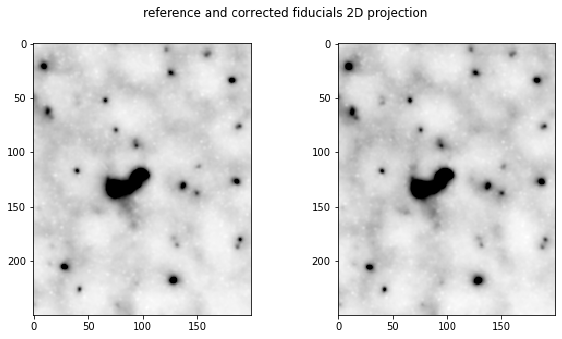

In [7]:

#%% plots 2d projection
fig, axes = plt.subplots(1,2)
fig.set_size_inches((10, 5))
ax=axes.ravel()
fig.suptitle("reference and corrected fiducials 2D projection")
subVolume=((0,60),(0,2048),(0,2048))
subVolume=((0,60),(1000,1250),(800,1000))

cmap='Greys'
ax[0].imshow(np.sum(img1[subVolume[0][0]:subVolume[0][1],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]],axis=0),cmap=cmap,vmax=1)
# ax[1].imshow(img2_corrected[subVolume[0][0],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]].transpose(),cmap=cmap,vmax=1000)
ax[1].imshow(np.sum(img2_corrected[subVolume[0][0]:subVolume[0][1],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]],axis=0),cmap=cmap,vmax=1)
plt.show()


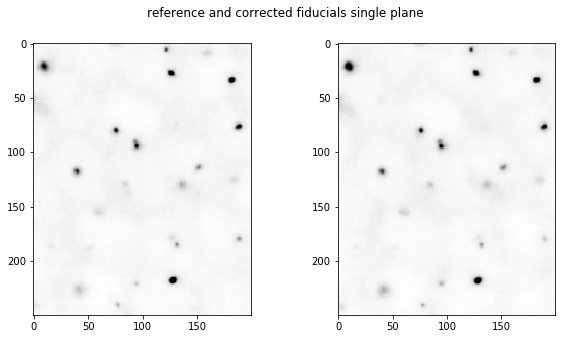

ready


In [16]:
#%% plots 2d single Z plane
fig, axes = plt.subplots(1,2)
fig.set_size_inches((10, 5))
ax=axes.ravel()
fig.suptitle("reference and corrected fiducials single plane")
subVolume=((40,60),(0,2048),(0,2048))
subVolume=((40,60),(1000,1250),(800,1000))

cmap='Greys'
ax[0].imshow((img1[subVolume[0][0],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]]),cmap=cmap,vmax=.05)
ax[1].imshow(img2_corrected[subVolume[0][0],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]],cmap=cmap,vmax=.05)
# ax[1].imshow((img2[subVolume[0][0],subVolume[1][0]:subVolume[1][1],subVolume[2][0]:subVolume[2][1]]),cmap=cmap,vmax=.041)
plt.show()
print('ready')


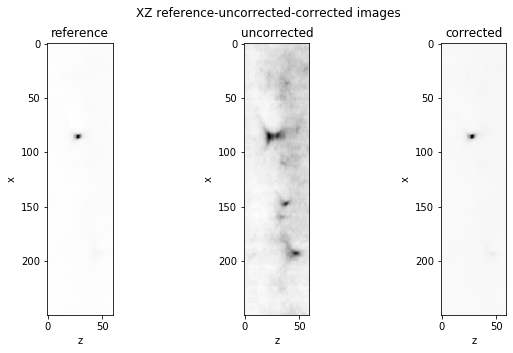

ready


In [26]:
#%% plots 3D

fig, axes = plt.subplots(1,3)
fig.set_size_inches((10, 5))
ax=axes.ravel()


titles = ["reference", "uncorrected","corrected"]
fig.suptitle("XZ {} images".format("-".join(titles)))

subVolume=((0,60),(1000,1250),(1200,1000))
cmap='Greys'
ax[0].imshow(img1[subVolume[0][0]:subVolume[0][1],subVolume[1][0]:subVolume[1][1],subVolume[2][0]].transpose(),cmap=cmap)
diffMatrix=img2-img1
ax[1].imshow(img2[subVolume[0][0]:subVolume[0][1],subVolume[1][0]:subVolume[1][1],subVolume[2][0]].transpose(),cmap=cmap)
diffMatrixCorrected=img2_corrected-img1
ax[2].imshow(img2_corrected[subVolume[0][0]:subVolume[0][1],subVolume[1][0]:subVolume[1][1],subVolume[2][0]].transpose(),cmap=cmap)

for axis,title in zip(ax,titles):
    axis.set_title(title)
    axis.set_xlabel('z')
    axis.set_ylabel('x')
    
plt.show()
print('ready')

## Conclusion

the cross correlation in 3D seems to work very well 

What I need to do now is to

- break matrices in blocks
- renormalize matrices to remove background and hot pixels before crosscorrelating
